<a href="https://colab.research.google.com/github/gagan3012/EAIS-Temporal-Bias/blob/master/RQ1_Semantic_representation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semantic Intergrity of Dates is defined as:
$$ \text{semantic integrity} = \max \left( 0, \min \left( 1, 1 - P - S - T - R\right) \right)$$

where:

- $ P = 0.3 $ if there is unnessary splitting of dates.
- $ S = 0.2 $ if separators are not preserved.
- $ T = 0.05 \times (\text{token\_count} - 5) $ if `token_count` > 5.
- $ \text{R} = 0.1 \times (1- \frac{\text{Tokenized Output} \cdot \text{Baseline}}{\|\text{Tokenized Output}\|\times\|\text{Baseline}\|})$

This version focuses on readability, defining how each component \( P \), \( S \), \( T \), and \( R \) contributes to the final score.

In [1]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.1 MB/s eta 0:00:00


Processing Llama 1...


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Processing Llama 2...


tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Processing Llama 3...


tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

Processing OLMoE...


tokenizer_config.json:   0%|          | 0.00/5.99k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Processing OLMo...


tokenizer_config.json:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Processing Mistral...


tokenizer_config.json:   0%|          | 0.00/141k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/587k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

Processing Qwen...


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Processing DeepSeek...


tokenizer_config.json:   0%|          | 0.00/3.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.61M [00:00<?, ?B/s]

Processing Phi 3.5...


tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Processing Cohere...


tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

Processing Cohere Aya...


tokenizer_config.json:   0%|          | 0.00/8.64k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/12.8M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

Processing GPT-4...
Processing GPT-4o...
Processing GPT-3.5...
Processing Davinci-003...
Processing Baseline...


<ipython-input-2-a20094b5f5fe>:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Model', y='Semantic Integrity', ax=axes[0, 0], palette='Set2')
<ipython-input-2-a20094b5f5fe>:222: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')



Model Performance Summary:
             Semantic Integrity  Token Count  Splits Components  \
Model                                                             
Baseline                  1.000        4.333              0.000   
OLMo                      0.762        4.853              0.643   
OLMoE                     0.762        4.853              0.643   
Davinci-003               0.723        4.972              0.746   
GPT-3.5                   0.624        5.000              1.000   
GPT-4                     0.624        5.000              1.000   
GPT-4o                    0.624        5.000              1.000   
Llama 3                   0.624        5.000              1.000   
Cohere                    0.406        9.333              1.000   
Cohere Aya                0.406        9.333              1.000   
DeepSeek                  0.406        9.333              1.000   
Qwen                      0.406        9.333              1.000   
Llama 1                   0.356   

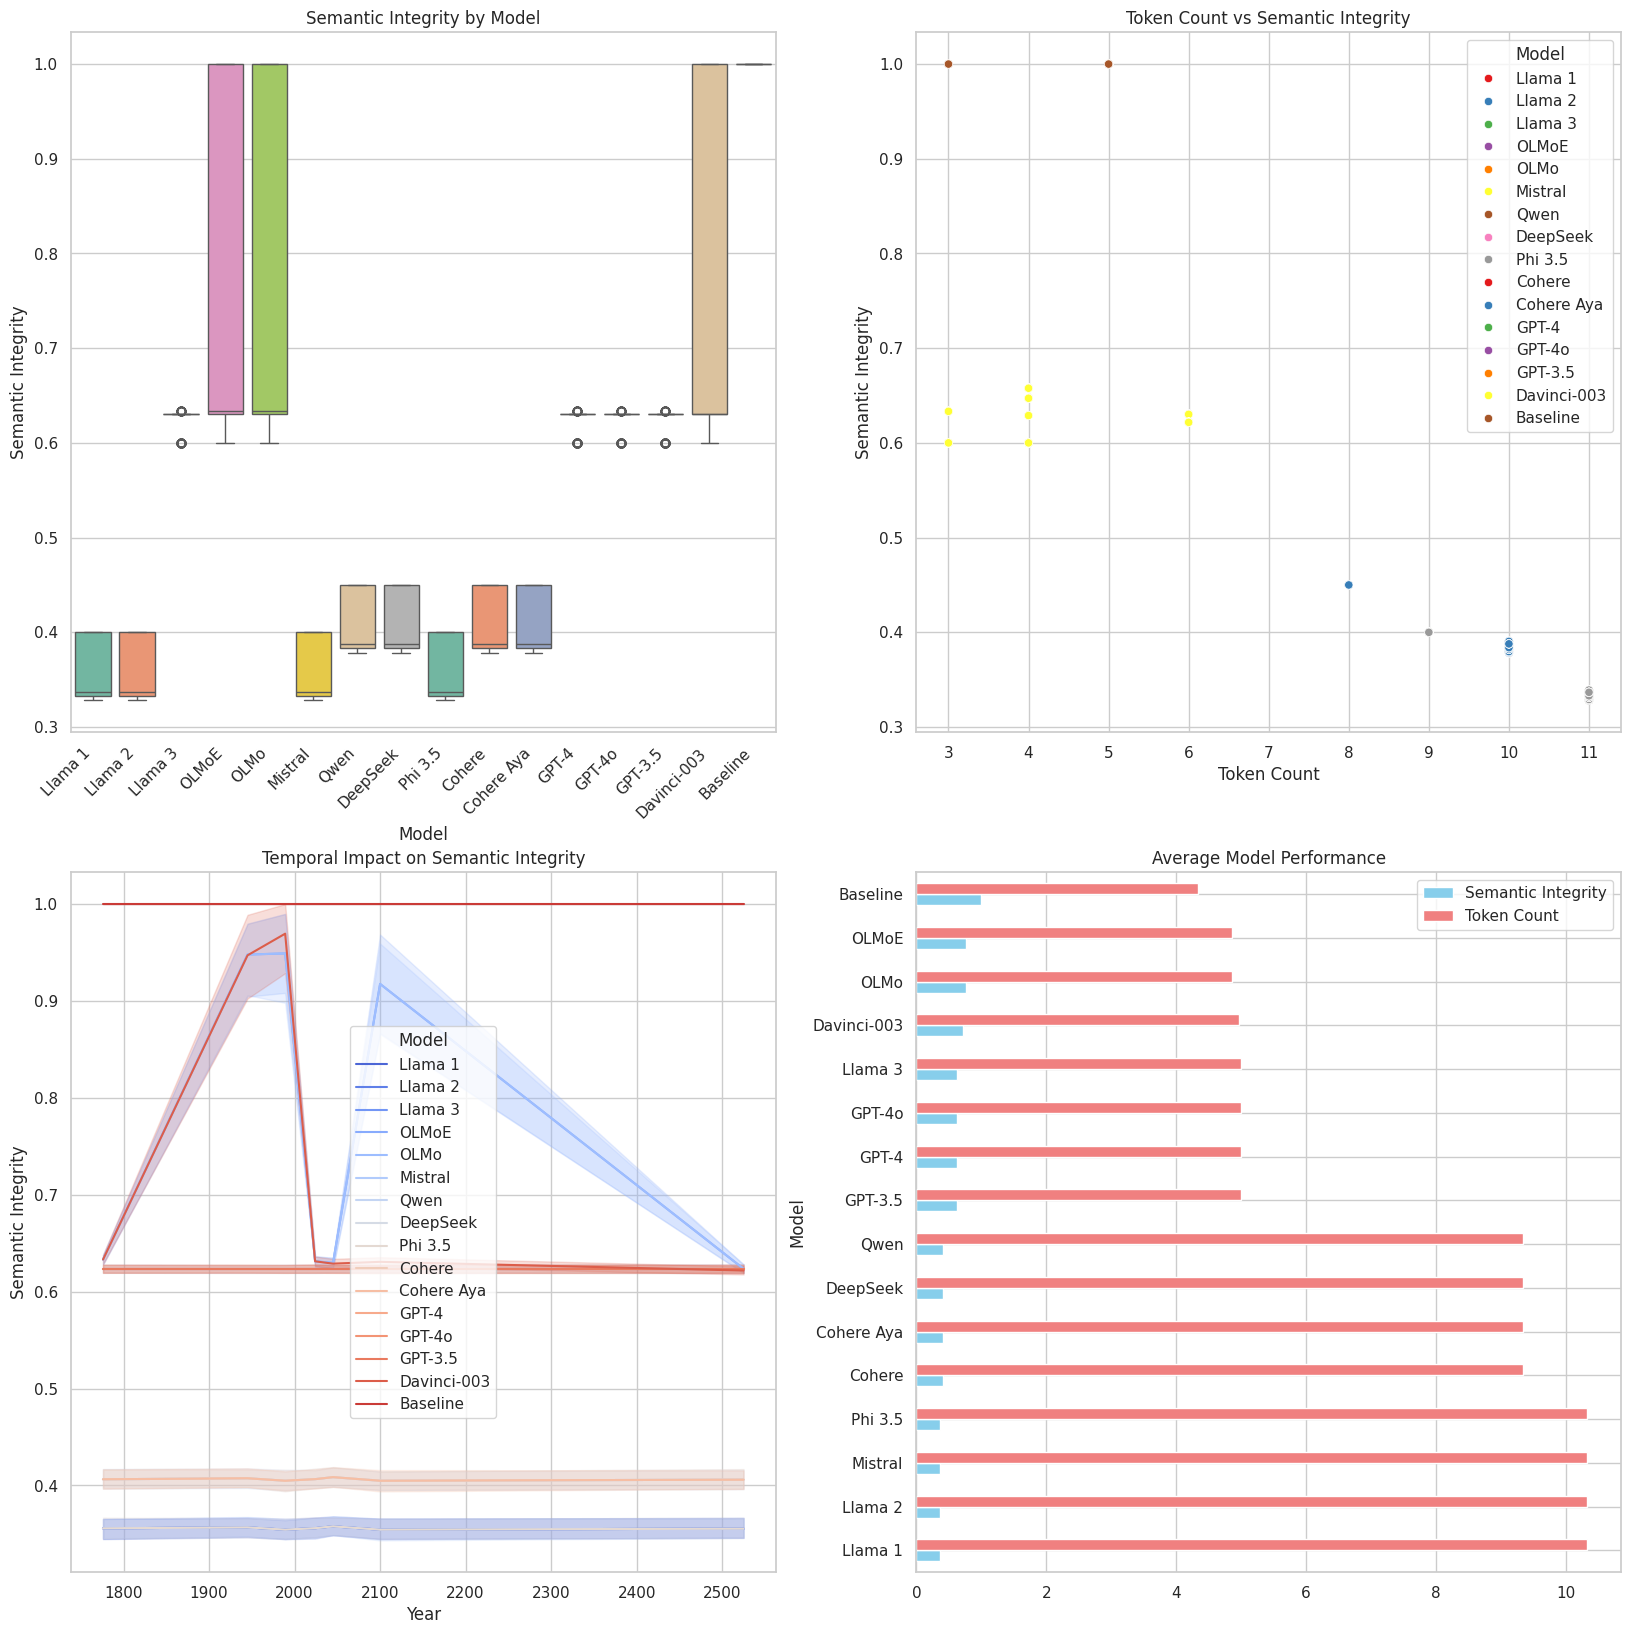

In [2]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import tiktoken
from collections import Counter, defaultdict
import random
from random import sample
import re

# Function to get the appropriate tiktoken encoding based on model name
def get_tiktoken_encoding(model_name):
    encoding_map = {
        "gpt-4": "cl100k_base",
        "gpt-3.5-turbo": "cl100k_base",
        "text-davinci-003": "p50k_base",
        "text-davinci-002": "p50k_base",
        "davinci": "r50k_base",
        "gpt-4o": "o200k_base"
    }
    try:
        return tiktoken.get_encoding(encoding_map.get(model_name, "cl100k_base"))
    except:
        return tiktoken.get_encoding("cl100k_base")

def theta(tokenized_output, baseline):
    t_vals = Counter(tokenized_output)
    b_vals = Counter(baseline)

    # convert to character-vectors
    characters = list(t_vals.keys() | b_vals.keys())
    t_vect = [t_vals.get(char, 0) for char in characters]
    b_vect = [b_vals.get(char, 0) for char in characters]

    # get theta
    len_t  = np.sqrt(sum(tv*tv for tv in t_vect))
    len_b  = np.sqrt(sum(bv*bv for bv in b_vect))
    dot    = sum(tv*bv for tv,bv in zip(t_vect, b_vect))
    theta = 1 - (dot / (len_t * len_b))
    return 0.1 * theta


# Improved semantic analysis function
def analyze_token_semantics(tokenized_output, format_type, model_name, date_str):
    analysis = {
        'splits_date_components': False,
        'preserves_separators': False,
        'token_count': len(tokenized_output),
        'theta': 1.0,
        'semantic_integrity': 1.0
    }
    correct = baseline_tokenizer(date_str, format_type)
    # correct = " ".join(correct)
    token_str = " ".join(tokenized_output)
    expected_components = {
        'YYYY': r'\b(17|18|19|20|21|22|23|24|25)\d{2}\b',
        'MM': r'\b(0[1-9]|1[0-2])\b',
        'DD': r'\b(0[1-9]|[12][0-9]|3[01])\b'
    }

    splitters = ['-', '/', '.', ' ']
    #compare with correct
    analysis['splits_date_components'] = tokenized_output != correct

    analysis['preserves_separators'] = any(sep in token_str for sep in splitters)

    # Check if separators are preserved
    analysis['preserves_separators'] = any(sep in token_str for sep in ['-', '/', '.', ' '])

    analysis['theta'] = theta(tokenized_output, correct)

    # Adjust semantic integrity based on analysis results
    if analysis['splits_date_components']:
        analysis['semantic_integrity'] -= 0.3

    if not analysis['preserves_separators']:
        analysis['semantic_integrity'] -= 0.2

    # Adjust for excessive token count only if it suggests non-compact representation
    if len(tokenized_output) > 5:
        analysis['semantic_integrity'] -= 0.05 * (len(tokenized_output) - 5)

    analysis['semantic_integrity'] -= analysis['theta']

    # Ensure semantic integrity score stays within valid bounds
    analysis['semantic_integrity'] = max(0.0, min(1.0, analysis['semantic_integrity']))

    return analysis

def baseline_tokenizer(date_str, format_type):
    format_map = {
        'YYYY-MM-DD': r'^(\d{4})(-)(\d{2})(-)(\d{2})$',
        'YYYY/MM/DD': r'^(\d{4})(/)(\d{2})(/)(\d{2})$',
        'YYYY.MM.DD': r'^(\d{4})(\.)(\d{2})(\.)(\d{2})$',
        'DD-MM-YYYY': r'^(\d{2})(-)(\d{2})(-)(\d{4})$',
        'DD/MM/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'MM/DD/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'YYYYMMDD': r'^(\d{4})(\d{2})(\d{2})$',
        'MMDDYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'DDMMYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'Month DD, YYYY': r'^(\w+)( )(\d{1,2})(, )(\d{4})$',
        'DD Month YYYY': r'^(\d{1,2})( )(\w+)( )(\d{4})$',
        'Month DD YYYY': r'^(\w+)( )(\d{1,2})( )(\d{4})$',
    }

    regex = format_map.get(format_type)
    if regex and re.match(regex, date_str):
        match = re.match(regex, date_str)
        if match:
            components = list(match.groups())
            return components
        else:
            print("Error: No match found")
            return [date_str]
    else:
        print("Error: Invalid format or no match")
        return [date_str]


# Function to generate date variations
def generate_date_variations(base_formats):
    date_variations = []
    years = [1776, 1945, 1989, 2024, 2045, 2100, 2525]
    months = sample(list(range(1, 13)), 2)
    days = sample(list(range(1, 29)), 2)

    month_names = {
        1: ('January', 'Jan'),
        2: ('February', 'Feb'),
        3: ('March', 'Mar'),
        4: ('April', 'Apr'),
        5: ('May', 'May'),
        6: ('June', 'Jun'),
        7: ('July', 'Jul'),
        8: ('August', 'Aug'),
        9: ('September', 'Sep'),
        10: ('October', 'Oct'),
        11: ('November', 'Nov'),
        12: ('December', 'Dec')
    }

    for year in years:
        for month in months:
            for day in days:
                for fmt in base_formats:
                    date_str = fmt.replace('YYYY', f'{year:04d}')\
                                  .replace('MM', f'{month:02d}')\
                                  .replace('DD', f'{day:02d}')
                    date_variations.append((date_str, year, fmt))

                # full_month, abbr_month = month_names[month]
                # text_formats = [
                #     f"{full_month} {day}, {year}",
                #     f"{abbr_month} {day}, {year}",
                #     f"{day} {full_month} {year}",
                #     f"{day} {abbr_month} {year}"
                # ]
                # date_variations.extend([(fmt, year, "Text") for fmt in text_formats])
                # date_variations.append((f"{year:04d}{month:02d}{day:02d}", year, "ISO"))

    return date_variations

# Function to tokenize dates and analyze their representation
# Function to tokenize dates and analyze their representation
def tokenize_dates(date_variations, model_name, to_print_name):
    results = []

    if model_name == "baseline":
        # Use baseline tokenizer for perfect tokenization
        tokenize_func = lambda x, fmt: baseline_tokenizer(x, fmt)
    elif model_name in ["gpt-4", "gpt-3.5-turbo", "text-davinci-003", "gpt-4o"]:
        tokenizer = get_tiktoken_encoding(model_name)
        tokenize_func = lambda x: tokenizer.encode(x)
        detokenize_func = lambda x: tokenizer.decode(x)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        tokenize_func = lambda x: tokenizer.encode(x, add_special_tokens=False)
        detokenize_func = lambda x: tokenizer.decode(x)

    for date_str, year, fmt in date_variations:
        if model_name == "baseline":
            tokenized_output = tokenize_func(date_str, fmt)
        else:
            tokens = tokenize_func(date_str)
            if isinstance(tokenizer, tiktoken.Encoding):
                tokenized_output = [detokenize_func([t]) for t in tokens]
            else:
                tokenized_output = tokenizer.convert_ids_to_tokens(tokens)

        semantic_analysis = analyze_token_semantics(tokenized_output, fmt, model_name, date_str)

        period = ("Historical (Pre-2000)" if year < 2000
                 else "Contemporary (2000-2024)" if 2000 <= year <= 2024
                 else "Future (Post-2024)")
        century = f"{(year // 100) + 1}th Century"

        results.append({
            'Model': to_print_name,
            'Date Format': date_str,
            'Year': year,
            'Time Period': period,
            'Century': century,
            'Token Count': len(tokenized_output),
            'Tokenized Output': " ".join(tokenized_output),
            'Semantic Integrity': semantic_analysis['semantic_integrity'],
            'Splits Components': semantic_analysis['splits_date_components'],
            'Preserves Separators': semantic_analysis['preserves_separators']
        })

    return pd.DataFrame(results)

# Enhanced function for better visualization
def plot_semantic_analysis(data):
    sns.set(style="whitegrid", context="notebook")
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    # fig.suptitle('Date Tokenization Semantic Analysis', fontsize=20, y=1)

    sns.boxplot(data=data, x='Model', y='Semantic Integrity', ax=axes[0, 0], palette='Set2')
    axes[0, 0].set_title('Semantic Integrity by Model')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

    sns.scatterplot(data=data, x='Token Count', y='Semantic Integrity', hue='Model', ax=axes[0, 1], palette='Set1')
    axes[0, 1].set_title('Token Count vs Semantic Integrity')

    sns.lineplot(data=data, x='Year', y='Semantic Integrity', hue='Model', ax=axes[1, 0], palette='coolwarm')
    axes[1, 0].set_title('Temporal Impact on Semantic Integrity')

    model_perf = data.groupby('Model')[['Semantic Integrity', 'Token Count']].mean().sort_values(by='Semantic Integrity')
    model_perf.plot(kind='barh', ax=axes[1, 1], color=['skyblue', 'lightcoral'])
    axes[1, 1].set_title('Average Model Performance')


def main():
    base_formats = [
        'YYYY-MM-DD',
        'YYYY/MM/DD',
        'YYYY.MM.DD',
        'DD-MM-YYYY',
        'DD/MM/YYYY',
        'MM/DD/YYYY',
        'YYYYMMDD',
        'MMDDYYYY',
        'DDMMYYYY'
    ]

    model_list = {
        'relaxml/Llama-1-7b-hf': 'Llama 1',
        'meta-llama/Llama-2-7b-hf': 'Llama 2',
        'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
        'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
        'allenai/OLMo-1B-0724-hf': 'OLMo',
        'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
        'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
        'deepseek-ai/DeepSeek-V2.5': 'DeepSeek',
        'microsoft/Phi-3.5-mini-instruct':'Phi 3.5',
        'CohereForAI/c4ai-command-r-plus-08-2024':'Cohere',
        'CohereForAI/aya-expanse-32b':'Cohere Aya',
        'gpt-4': 'GPT-4',
        'gpt-4o': 'GPT-4o',
        'gpt-3.5-turbo': 'GPT-3.5',
        'text-davinci-003': 'Davinci-003',
        'baseline': 'Baseline'
    }

    date_variations = generate_date_variations(base_formats)
    all_data = []

    for model_name, print_name in model_list.items():
        print(f"Processing {print_name}...")
        df = tokenize_dates(date_variations, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations and analysis
    fig = plot_semantic_analysis(combined_data)

    # Save results
    combined_data.to_csv('date_tokenization_semantic_analysis.csv', index=False)

    # Print summary statistics
    summary = combined_data.groupby('Model').agg({
        'Semantic Integrity': 'mean',
        'Token Count': 'mean',
        'Splits Components': 'mean',
        'Preserves Separators': 'mean'
    }).round(3)

    summary = summary.sort_values('Semantic Integrity', ascending=False)

    print("\nModel Performance Summary:")
    print(summary)

    return summary, combined_data


summary, combined_data = main()

In [3]:
summary

,Semantic Integrity,Token Count,Splits Components,Preserves Separators
Model,,,,
Baseline,1.000,4.333,0.000,1.0
OLMo,0.762,4.853,0.643,1.0
OLMoE,0.762,4.853,0.643,1.0
Davinci-003,0.723,4.972,0.746,1.0
GPT-3.5,0.624,5.000,1.000,1.0
GPT-4,0.624,5.000,1.000,1.0
GPT-4o,0.624,5.000,1.000,1.0
Llama 3,0.624,5.000,1.000,1.0
Cohere,0.406,9.333,1.000,1.0


In [10]:
new_df = combined_data.groupby(['Model']).sample(n=1, random_state=42)
new_df

,Model,Date Format,Year,Time Period,Century,Token Count,Tokenized Output,Semantic Integrity,Splits Components,Preserves Separators
3945,Baseline,28-09-2045,2045,Future (Post-2024),21th Century,5,28 - 09 - 2045,1.000000,False,True
2365,Cohere,09281989,1989,Historical (Pre-2000),20th Century,8,0 9 2 8 1 9 8 9,0.450000,True,True
2640,Cohere Aya,16-11-2024,2024,Contemporary (2000-2024),21th Century,10,1 6 - 1 1 - 2 0 2 4,0.383806,True,True
3661,Davinci-003,09282024,2024,Contemporary (2000-2024),21th Century,4,09 28 20 24,0.657735,True,True
1876,DeepSeek,28/11/2024,2024,Contemporary (2000-2024),21th Century,10,2 8 / 1 1 / 2 0 2 4,0.383806,True,True
3425,GPT-3.5,11/28/2045,2045,Future (Post-2024),21th Century,6,11 / 28 / 204 5,0.630178,True,True
2928,GPT-4,16-11-2045,2045,Future (Post-2024),21th Century,6,16 - 11 - 204 5,0.630178,True,True
3174,GPT-4o,20451128,2045,Future (Post-2024),21th Century,3,204 511 28,0.633333,True,True
39,Llama 1,28-11-1945,1945,Historical (Pre-2000),20th Century,11,▁ 2 8 - 1 1 - 1 9 4 5,0.334684,True,True
482,Llama 2,11/16/2525,2525,Future (Post-2024),26th Century,11,▁ 1 1 / 1 6 / 2 5 2 5,0.331524,True,True


In [5]:
#find the rows that have models as baseline and semaitic ingegeyt as 0.7
combined_data[(combined_data['Model'] != 'Baseline') & (combined_data['Semantic Integrity'] == 1 )]

,Model,Date Format,Year,Time Period,Century,Token Count,Tokenized Output,Semantic Integrity,Splits Components,Preserves Separators
792,OLMoE,1945-11-28,1945,Historical (Pre-2000),20th Century,5,1945 - 11 - 28,1.0,False,True
793,OLMoE,1945/11/28,1945,Historical (Pre-2000),20th Century,5,1945 / 11 / 28,1.0,False,True
794,OLMoE,1945.11.28,1945,Historical (Pre-2000),20th Century,5,1945 . 11 . 28,1.0,False,True
795,OLMoE,28-11-1945,1945,Historical (Pre-2000),20th Century,5,28 - 11 - 1945,1.0,False,True
796,OLMoE,28/11/1945,1945,Historical (Pre-2000),20th Century,5,28 / 11 / 1945,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...
3631,Davinci-003,16/09/1989,1989,Historical (Pre-2000),20th Century,5,16 / 09 / 1989,1.0,False,True
3632,Davinci-003,09/16/1989,1989,Historical (Pre-2000),20th Century,5,09 / 16 / 1989,1.0,False,True
3633,Davinci-003,19890916,1989,Historical (Pre-2000),20th Century,3,1989 09 16,1.0,False,True
3634,Davinci-003,09161989,1989,Historical (Pre-2000),20th Century,3,09 16 1989,1.0,False,True
